In [1]:
import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from functools import partial

In [2]:
def read_all_results(dir_path):
    paths = os.listdir(dir_path)
    last_gens = []
    for i in range(len(paths)):
        path = dir_path + paths[i]
        try:
            last_gen = sorted(map(lambda x: x.split("_"), 
                            os.listdir(f"{path}/individuals/")), 
                            key=lambda x: int(x[1].split(".")[0]))[-1][-1][:-4]
            print(f"Path: {paths[i]}, last generation: {int(last_gen)}")
            last_gens.append(int(last_gen))
        except:
            continue
    return paths, last_gens

In [3]:
dir_path = "results/"
paths, last_gens = read_all_results(dir_path)

Path: GA_2021_06_02_01_48_33, last generation: 24
Path: GA_2021_06_02_01_49_34, last generation: 18
Path: GA_2021_06_02_01_45_54, last generation: 23
Path: GA_2021_06_02_01_49_10, last generation: 51
Path: GA_2021_06_02_01_49_20, last generation: 17
Path: GA_2021_06_02_01_45_41, last generation: 31
Path: GA_2021_06_02_01_48_43, last generation: 37
Path: GA_2021_06_02_01_48_23, last generation: 13


In [65]:
run = -1
path = dir_path + paths[run]
with open(dir_path + paths[run] + "/run_params.json", "r") as file:
    print(file.read())
    file.close()

{
    "objective": "infected",
    "simulations": 15,
    "process": {
        "horizon": 74,
        "decision_period": 28,
        "policy": "weighted"
    },
    "population_size": 30,
    "random_individuals": false,
    "min_generations": 30
}


## Individual results

In [61]:
gen = 51
individuals_path =  f"{path}/individuals/individuals_{gen}.pkl"
individuals = utils.read_pickle(individuals_path)

In [62]:
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
print("Strategy_count:")
print(f"{utils.tcolors.BOLD}{'#':<3} {'U':<5}{'D':<5}{'N':<5}{utils.tcolors.ENDC}")
for trend_count in range(6):
    strategy_count = individuals[0].strategy_count
    print(f"{trend_count+1:<2}| {strategy_count['U'][trend_count]:<5}{strategy_count['D'][trend_count]:<5}{strategy_count['N'][trend_count]:<5}")
print()
for ix, i in enumerate(sorted(individuals, key=lambda x: x.mean_score)):
    print(f"{utils.tcolors.BOLD}{ordinal(ix+1)} place:{utils.tcolors.ENDC}")
    print(f"ID: {i.ID}")
    print(f"Score: {np.round(i.mean_score, 3)}")
    print(f"Genes:\n{np.round(i.genes, 3)}")
    print()

Strategy_count:
#   U    D    N    
1 | 15   15   15   
2 | 8    14   15   
3 | 4    9    15   
4 | 2    1    12   
5 | 0    1    3    
6 | 0    0    0    

1st place:
ID: gen_0_003
Score: 2579.201
Genes:
[[[0.047 0.198 0.209 0.494 0.052]
  [0.127 0.378 0.22  0.05  0.224]
  [0.071 0.045 0.229 0.361 0.293]]

 [[0.052 0.244 0.244 0.378 0.081]
  [0.252 0.204 0.255 0.177 0.111]
  [0.058 0.075 0.234 0.308 0.325]]

 [[0.01  0.229 0.29  0.223 0.248]
  [0.299 0.308 0.137 0.066 0.19 ]
  [0.286 0.353 0.035 0.267 0.059]]]

2nd place:
ID: gen_29_011
Score: 2593.588
Genes:
[[[0.224 0.118 0.177 0.434 0.046]
  [0.264 0.213 0.171 0.178 0.174]
  [0.206 0.132 0.172 0.27  0.22 ]]

 [[0.316 0.055 0.338 0.239 0.052]
  [0.252 0.082 0.313 0.217 0.136]
  [0.13  0.222 0.175 0.23  0.243]]

 [[0.171 0.254 0.181 0.186 0.208]
  [0.338 0.066 0.208 0.101 0.287]
  [0.086 0.592 0.031 0.238 0.052]]]

3rd place:
ID: gen_42_010
Score: 2597.521
Genes:
[[[0.152 0.165 0.198 0.389 0.096]
  [0.16  0.336 0.239 0.047 0.218]
  [

In [8]:
genes = np.sum(individuals[0].genes, axis=(0,1))
norm = np.sum(genes)
norm_genes = np.divide(genes, norm)
print(norm_genes)

[0.13351274 0.22604676 0.20615092 0.25825655 0.17603303]


## Generation Means

In [76]:
for gen in range(len(final_scores)):
    for individual in final_scores[gen]:
        for objective in final_scores[gen][individual]:
            if len(final_scores[gen][individual][objective]) > 15:
                print(f"{gen} {individual} {objective}")

6 gen_2_001 deaths
6 gen_2_001 infected
6 gen_2_001 weighted
6 gen_2_001 yll
6 gen_3_002 deaths
6 gen_3_002 infected
6 gen_3_002 weighted
6 gen_3_002 yll
6 gen_4_007 deaths
6 gen_4_007 infected
6 gen_4_007 weighted
6 gen_4_007 yll
6 gen_5_005 deaths
6 gen_5_005 infected
6 gen_5_005 weighted
6 gen_5_005 yll
6 gen_6_010 deaths
6 gen_6_010 infected
6 gen_6_010 weighted
6 gen_6_010 yll
7 gen_0_002 deaths
7 gen_0_002 infected
7 gen_0_002 weighted
7 gen_0_002 yll
7 gen_0_011 deaths
7 gen_0_011 infected
7 gen_0_011 weighted
7 gen_0_011 yll
7 gen_1_006 deaths
7 gen_1_006 infected
7 gen_1_006 weighted
7 gen_1_006 yll
7 gen_5_005 deaths
7 gen_5_005 infected
7 gen_5_005 weighted
7 gen_5_005 yll
7 gen_7_012 deaths
7 gen_7_012 infected
7 gen_7_012 weighted
7 gen_7_012 yll
11 gen_0_002 deaths
11 gen_0_002 infected
11 gen_0_002 weighted
11 gen_0_002 yll
11 gen_1_006 deaths
11 gen_1_006 infected
11 gen_1_006 weighted
11 gen_1_006 yll
11 gen_5_005 deaths
11 gen_5_005 infected
11 gen_5_005 weighted
11 g

In [66]:
generation_scores = os.listdir(path+"/final_scores/")
final_scores = []
for score in sorted(generation_scores, key=lambda x: int(x.split("_")[2][:-4])):
    final_scores.append(utils.read_pickle(path+"/final_scores/"+score))

generation_means = defaultdict(list)
for gen_scores in final_scores:
    gen_individual_means = defaultdict(list)
    for individual in gen_scores.keys():
        for objective, scores in gen_scores[individual].items():
            gen_individual_means[objective].append(np.mean(scores))
    for objective, scores in gen_individual_means.items():
        generation_means[objective].append(np.mean(scores))
generation_means = dict(generation_means)
results = pd.DataFrame(generation_means)
results.index.rename("generation", inplace=True)
results

,deaths,infected,weighted,yll
generation,,,,
0,1310.236090,132032.514259,2630.561232,17541.753333
1,1308.996685,131692.579025,2625.922476,17509.427957
2,1307.195736,131330.026903,2620.496005,17467.222917
3,1305.148125,130976.328863,2614.911413,17423.436364
4,1302.839021,130604.862964,2608.887650,17377.649020
5,1300.350894,130219.427076,2602.545164,17329.864762
6,1309.798267,130893.019625,2618.728463,17434.038973
7,1292.147519,129219.548048,2584.342999,17197.867158
8,1294.509287,129255.802073,2587.067308,17212.738596


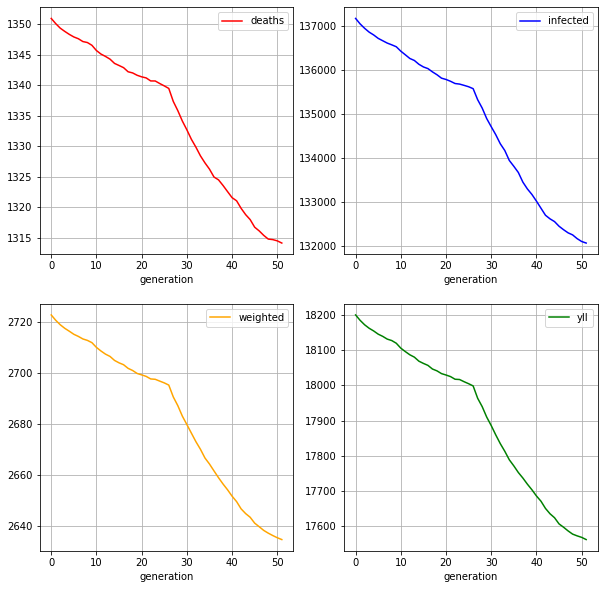

In [64]:
colors = ["red", "blue", "orange", "green"]
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i, col in enumerate(results.columns):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.legend()
    ax.grid()
plt.show()

## Best individual

In [77]:
filenames = os.listdir(path+"/best_individuals/")
best_individuals = []
for individual in sorted(filenames, key=lambda x: int(x.split("_")[2][:-4])):
    best_individuals.append(utils.read_pickle(path+"/best_individuals/"+individual))

best_individual_scores = defaultdict(partial(defaultdict, int))
for i, individual in enumerate(best_individuals):
    for obj in ["deaths", "infected", "weighted", "yll"]:
        best_individual_scores[individual.ID][obj] = np.mean(final_scores[i][individual.ID][obj])
results = pd.DataFrame(dict(best_individual_scores)).T
results.index.rename("individual", inplace=True)
results

,deaths,infected,weighted,yll
individual,,,,
gen_0_002,1240.558023,119481.586152,2435.373884,16025.733333
gen_4_007,1226.638585,118346.488293,2410.103468,15866.666667
gen_5_005,1294.650590,123757.941704,2532.230007,16696.272727
gen_7_012,1209.594416,115933.888093,2368.933297,15605.666667
gen_11_005,1333.037198,127098.146343,2604.018661,17172.500000


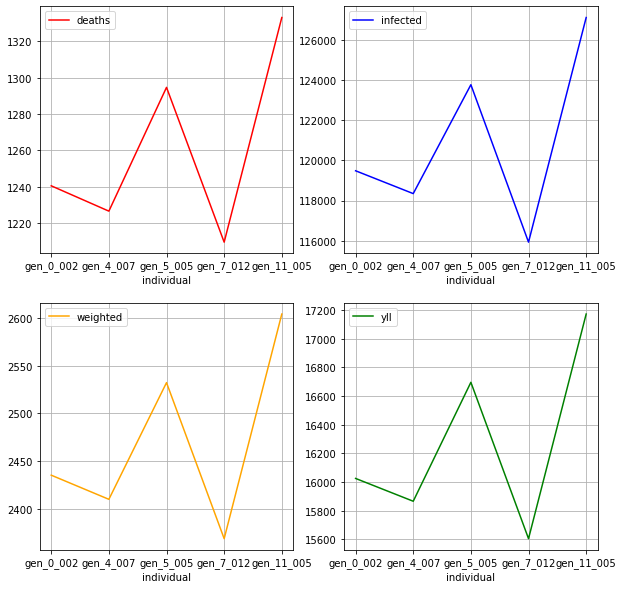

In [59]:
colors = ["red", "blue", "orange", "green"]
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i, col in enumerate(results.columns):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.legend()
    ax.grid()
plt.show()